In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
# Load the dataset
loan_dataset = pd.read_csv("loan_dataset.csv")

# Displaying first few rows of dataset
display(loan_dataset.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Detecting missing values
def detect_missing_values(dataframe):
    missing_values = dataframe.isnull().sum()
    total_rows = dataframe.shape[0]
    missing_percentage = round((missing_values / total_rows) * 100,2)
    missing_info = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    print("Missing Value Information:")
    display(missing_info)

# Detect missing values in both training and test datasets
print("Loan Dataset:")
detect_missing_values(loan_dataset)
# print("\nTest Data:")
# detect_missing_values(X_test)

Loan Dataset:
Missing Value Information:


,Missing Values,Percentage
Loan_ID,0,0.00
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Education,0,0.00
Self_Employed,32,5.21
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28


In [4]:
# Handling missing values
# For Numerical values --> KNN Imputation
# For Categorical values --> Using mode

def handle_missing_values(dataframe):

    # Numerical features for KNN imputation
    num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5)
    
    # Impute missing values
    dataframe[num_features] = imputer.fit_transform(dataframe[num_features])
    
    # Impute missing values in categorical features with mode
    cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
    
    for feature in cat_features:
        mode_value = dataframe[feature].mode()[0]
        dataframe[feature].fillna(mode_value, inplace=True)

# Handling missing values in the dataset
handle_missing_values(loan_dataset)
# handle_missing_values(X_test)


In [5]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
display(loan_dataset.describe())


Summary Statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.00000,614.000000
mean,5403.459283,1621.245798,146.375896,342.03127,0.855049
std,6109.041673,2926.248369,85.465415,64.47906,0.352339
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,167.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


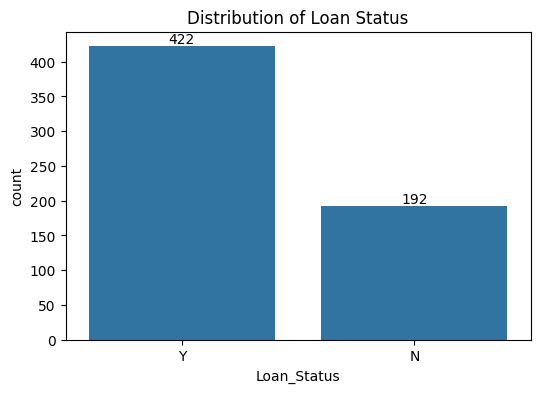

In [6]:
# Visualizing the distribution of target variable with numbers on bars
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Loan_Status', data=loan_dataset)
plt.title('Distribution of Loan Status')

# Add numbers on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


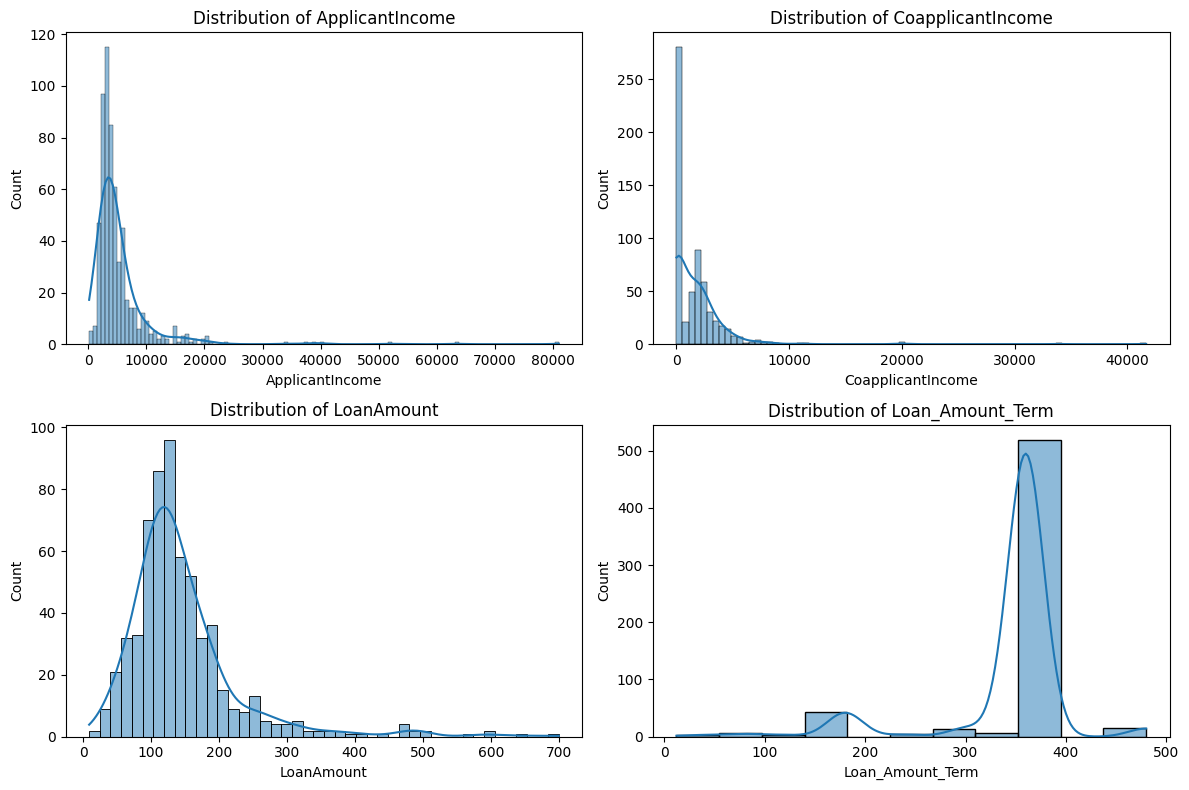

In [7]:
# Visualizing the distribution of numerical features
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(loan_dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

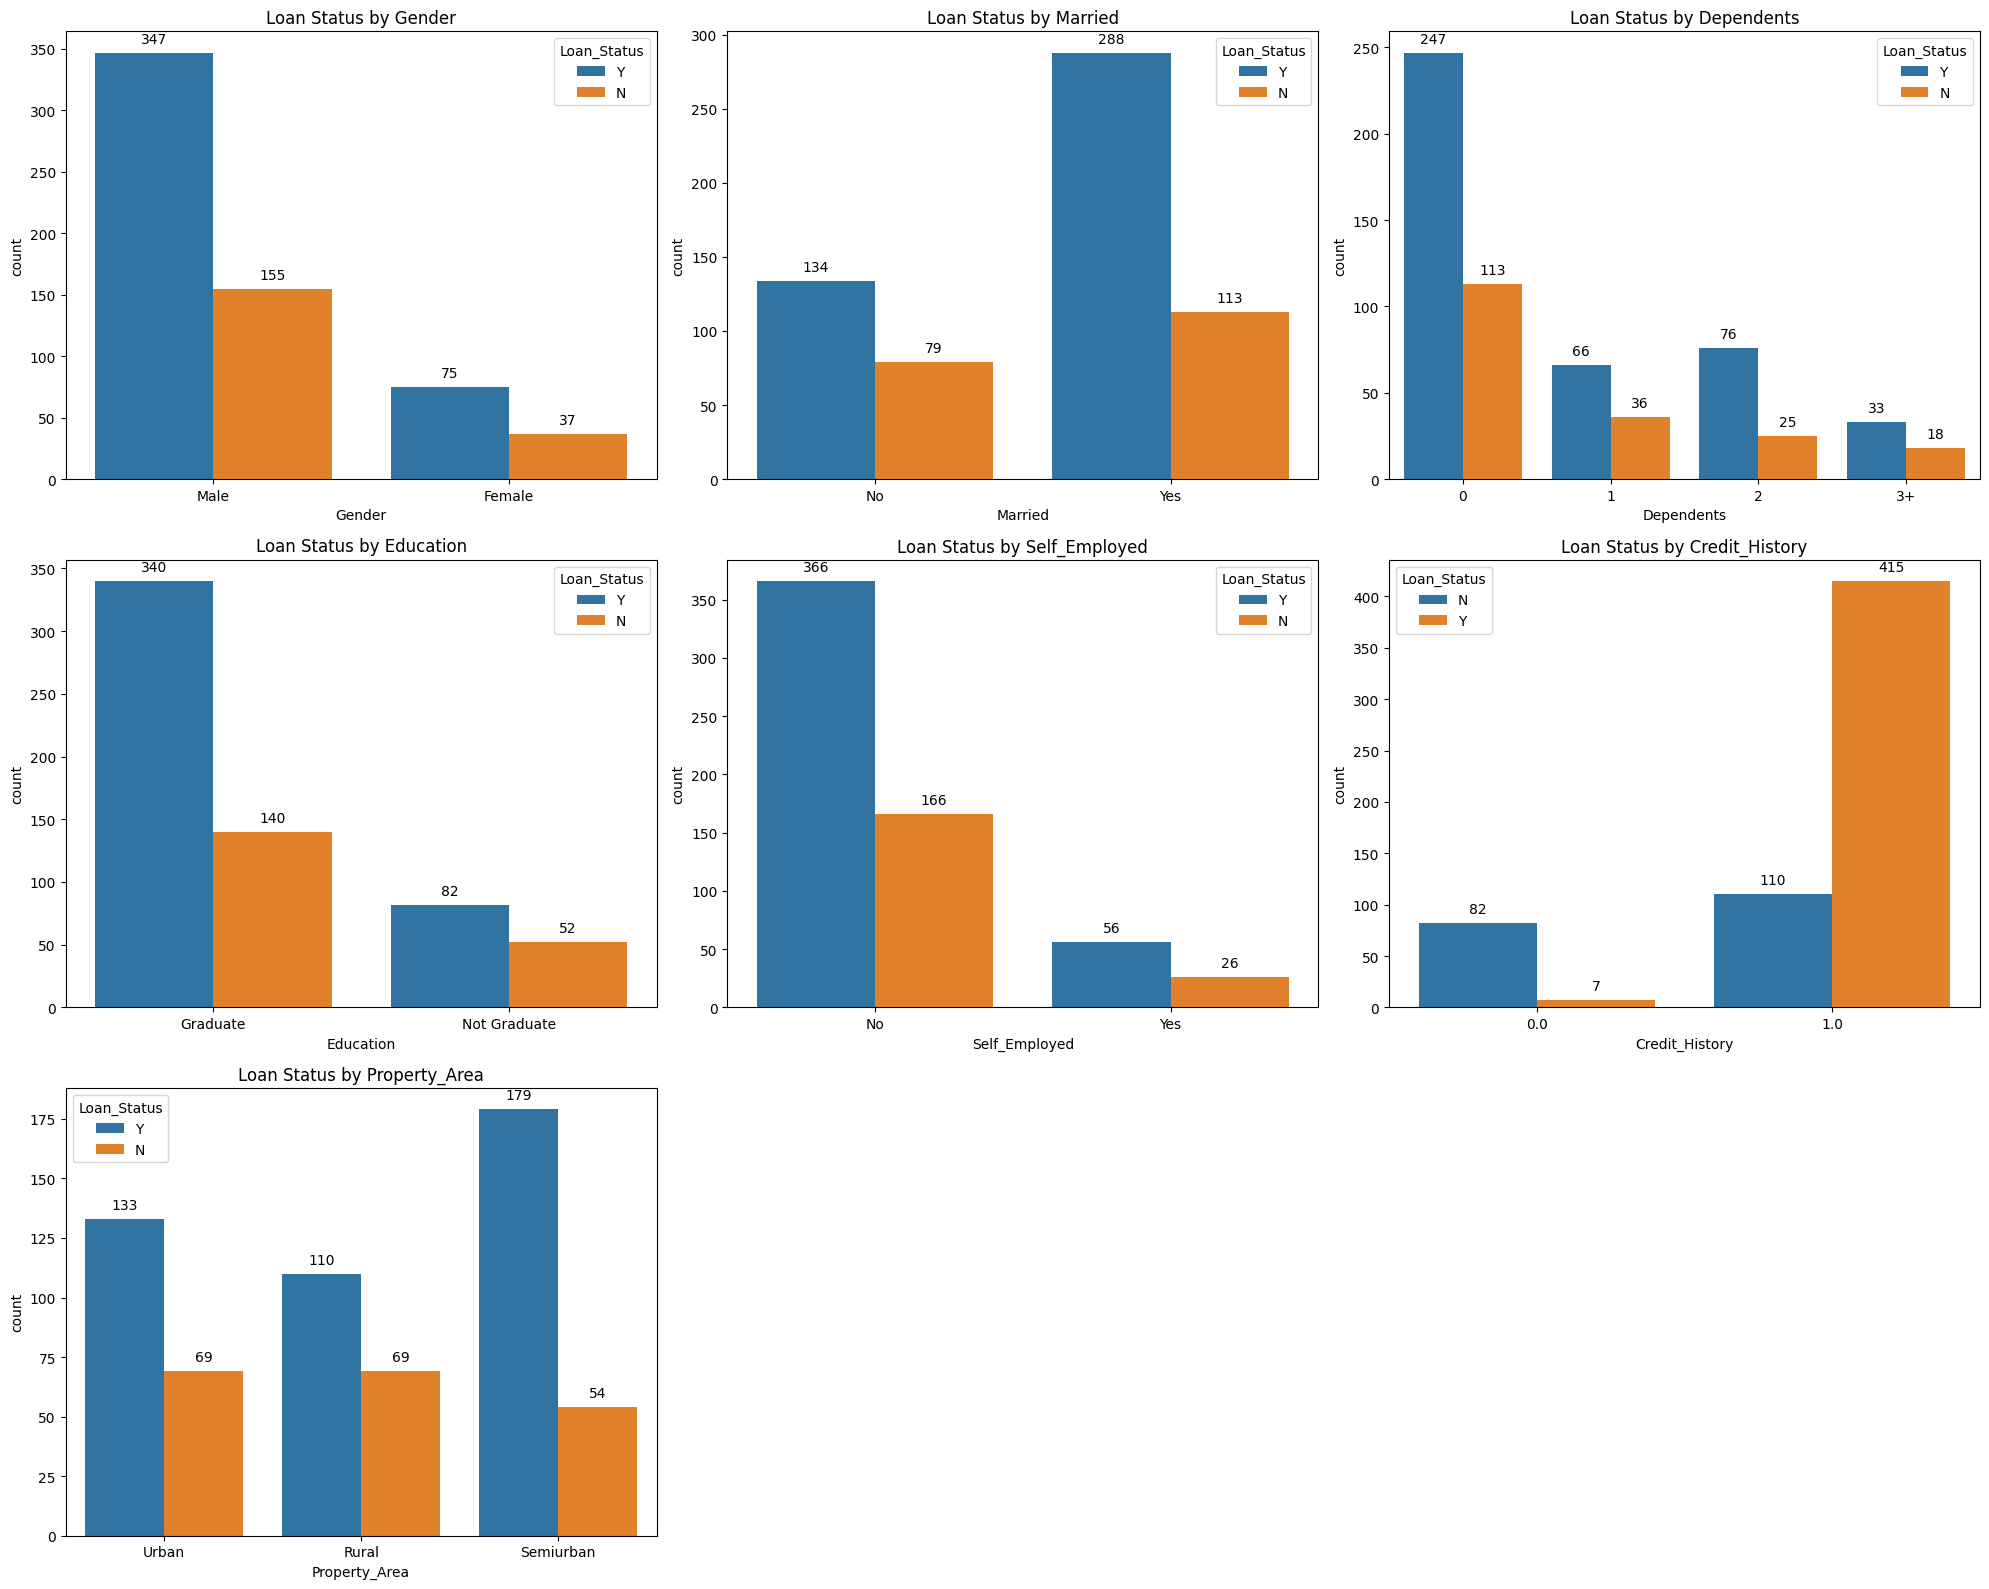

In [8]:
# Visualizing the relationship between categorical features and target variable with numbers on bars
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
plt.figure(figsize=(20, 16))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=feature, hue='Loan_Status', data=loan_dataset)
    plt.title(f'Loan Status by {feature}')
    
    # Add numbers on bars
    for p in ax.patches:
        if np.isnan(p.get_height()):  # Skip NaN values
            continue
        if p.get_height() != 0:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


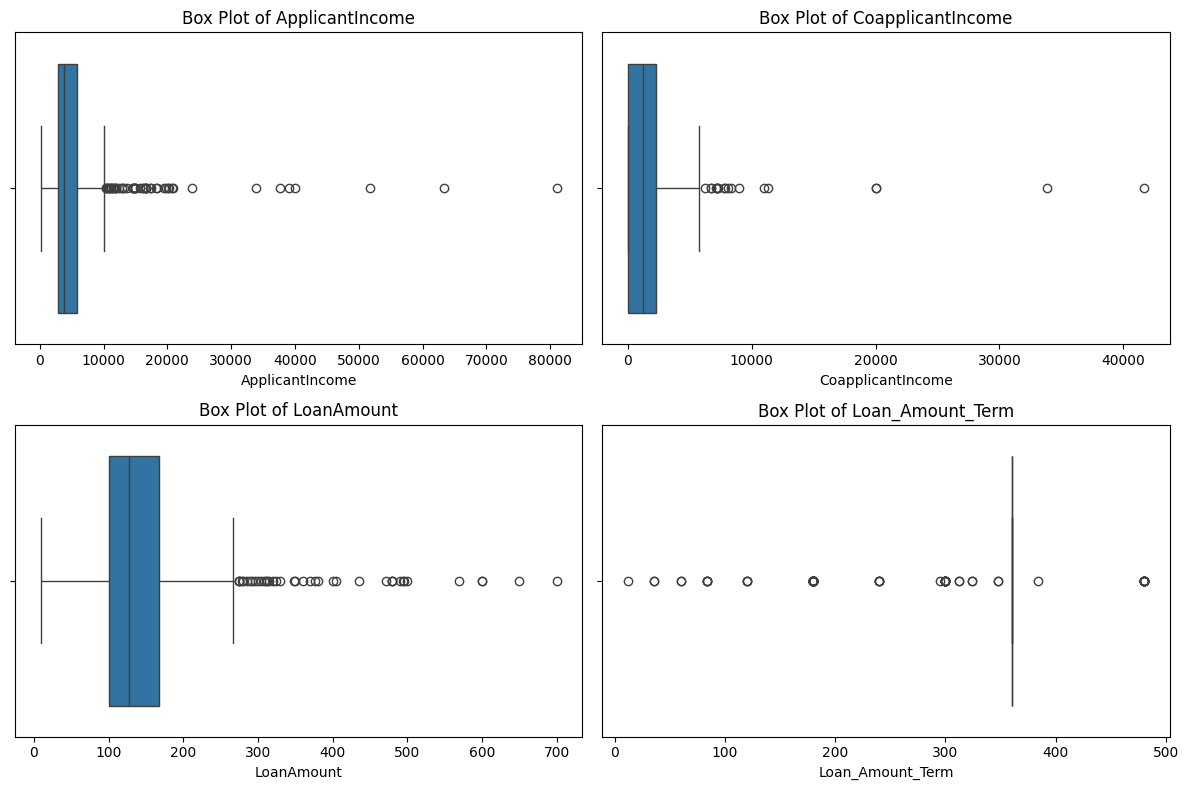

In [9]:
# Detecting outliers using box plot
# Define numerical features for outlier detection
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=loan_dataset[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


In [10]:
# Handling outliers
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])

# Handling outliers in numerical features
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in num_features:
    handle_outliers(loan_dataset, feature)
    # handle_outliers(X_test, feature)


In [11]:
# Split the dataset into features (X) and target variable (y)
X = loan_dataset.drop(['Loan_ID','Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Optionally, you can save the train and test sets to CSV files
# X_train.to_csv("train_data.csv", index=False)
# X_test.to_csv("test_data.csv", index=False)
# y_train.to_csv("train_labels.csv", index=False)
# y_test.to_csv("test_labels.csv", index=False)

In [12]:

# Encoding categorical variables
label_encoder = LabelEncoder()
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for feature in cat_features:
    # Fit label encoder on the training data and transform it
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    # Transform the test data using the label encoder fitted on the training data
    X_test[feature] = label_encoder.transform(X_test[feature])


# Define the numeric features to be scaled
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# Transform the test data using the scaler fitted on the training data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [20, 25, 30],  # Number of trees in the forest
    'max_depth': [None, 2, 3, 4, 5, 6],   # Maximum depth of the trees
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}


# Define the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

# Print the best mean cross-validation score
print("Best mean cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best mean cross-validation score: 0.8145949288806431


In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_test_pred = best_clf.predict(X_test)

# Evaluate the model's performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Test accuracy: 0.7804878048780488

Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.40      0.56        43
           Y       0.75      0.99      0.85        80

    accuracy                           0.78       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.78      0.75       123



In [15]:
import pickle

# Save the trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

# Save the label encoder for categorical features
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Save the standard scaler for numeric features
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
